# make signal data to structure data using sliding window techniques
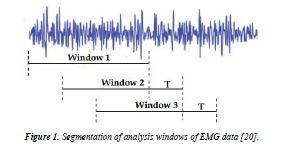

## import library 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math 
import pickle
import os 

## get data from google drive

In [2]:
# get data from google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Data Directory
data_dir = '/content/drive/MyDrive/SEMG_DB1'

## Normal SEMG dataset
n_data = "/content/drive/MyDrive/SEMG_DB1/N_TXT/"

## Abnormal SEMG dataset
a_data = "/content/drive/MyDrive/SEMG_DB1/A_TXT/"

## Data frame 
df_path = "/content/drive/MyDrive/datapkle/dd.pkl"

In [4]:
# read dataframe form pickle file 
df = pd.read_pickle(df_path)
df.head(5)

,RF,BF,VM,ST,FX,target
0,0.0000,0.0052,0.0007,-0.0030,-4.6,1
1,-0.0015,-0.0068,0.0030,-0.0091,-4.5,1
2,-0.0053,-0.0458,-0.0008,-0.0098,-4.6,1
3,-0.0068,-0.0398,-0.0008,-0.0068,-4.6,1
4,-0.0030,-0.0368,-0.0038,-0.0046,-4.5,1


In [5]:
print(df.target.dtype)
lenth = len(df['target'])
lenth

int64


1320231

In [6]:
cnt = 0 
for i in range(lenth):
  if df.target.iloc[i] == 0 :
    break
  cnt = cnt + 1 
print('number of abnormal samples :' , cnt)

number of abnormal samples : 850515


In [7]:
## split abnormal data and normal data 
ab_df = df.iloc[:850515,:]   
nr_df = df.iloc[850516:,:]
print('number of normal samples=',len(nr_df))
print('number of abnormal samples=',len(ab_df))

number of normal samples= 469715
number of abnormal samples= 850515


## transform signal data to structure data 

In [8]:

def sliding_window(df):
    
  # define the window size
  window_size = 5000

  # create empty container for rows of structured data
  structured_data = []

  # iterate over the time series data with a sliding window
  ## get percent of overlapping
  # overlapping = int(window_size * 0.9) = 4500
  for i in range(0,len(df.index) - window_size,500):
      window_start = i
      window_end = i + window_size
      # print('window_start',window_start,'end',window_end)

      # extract the window of data
      window = df[window_start:window_end]
      
      # print(len(window))
      # create the structured data row with five features
      row = {
          # RF      BF      VM      ST    FX
          'feature_one': window['RF'].pow(2).mean(),
          # 'feature_two': peak_vale(window,'RF'),
          'feature_two': window['RF'].max(),
          'feature_three': window['RF'].mean(),
          'feature_four': window['RF'].std(),
          'feature_five': window['RF'].var(),
          
          'feature2_one': window['BF'].pow(2).mean(),
          # 'feature2_two': peak_vale(window,'BF'),
          'feature2_two': window['BF'].max(),
          'feature2_three': window['BF'].mean(),
          'feature2_four': window['BF'].std(),
          'feature2_five': window['BF'].var(),
          
          'feature3_one': window['VM'].pow(2).mean(),
          # 'feature3_two': peak_vale(window,'VM'),
          'feature3_two': window['VM'].max(),
          'feature3_three': window['VM'].mean(),
          'feature3_four': window['VM'].std(),
          'feature3_five': window['VM'].var(),
          
          'feature4_one': window['ST'].pow(2).mean(),
          # 'feature4_two': peak_vale(window,'ST'),
          'feature4_two': window['ST'].max(),
          'feature4_three': window['ST'].mean(),
          'feature4_four': window['ST'].std(),
          'feature4_five': window['ST'].var(),

          'feature5_one': window['FX'].pow(2).mean(),
          # 'feature5_two': peak_vale(window,'FX'),
          'feature5_two':  window['FX'].max(),
          'feature5_three': window['FX'].mean(),
          'feature5_four': window['FX'].std(),
          'feature5_five': window['FX'].var()
      }
      
      # add the row to the container
      structured_data.append(row)

      # convert the container into a dataframe
      df_structured = pd.DataFrame(structured_data)

  return df_structured


In [9]:
# structure normal data 
st_normal_df = sliding_window(nr_df)
print(st_normal_df.head(5))

   feature_one  feature_two  feature_three  feature_four  feature_five  \
0     0.000673       0.1882       0.000262      0.025934      0.000673   
1     0.000673       0.1882       0.000272      0.025938      0.000673   
2     0.000755       0.1882       0.000292      0.027473      0.000755   
3     0.004929       0.6405       0.000364      0.070215      0.004930   
4     0.005666       0.6405       0.000242      0.075277      0.005667   

   feature2_one  feature2_two  feature2_three  feature2_four  feature2_five  \
0      0.000175        0.2482        0.000523       0.013218       0.000175   
1      0.000177        0.2482        0.000523       0.013283       0.000176   
2      0.000136        0.1342        0.000505       0.011649       0.000136   
3      0.000168        0.1470        0.000381       0.012971       0.000168   
4      0.000145        0.1470        0.000257       0.012046       0.000145   

   ...  feature4_one  feature4_two  feature4_three  feature4_four  \
0  ...     

In [10]:
st_normal_df.shape

(930, 25)

In [11]:
# structure normal data 
st_abnormal_df = sliding_window(ab_df)
print(st_abnormal_df.head(5))

   feature_one  feature_two  feature_three  feature_four  feature_five  \
0     0.000046       0.0532      -0.000378      0.006740      0.000045   
1     0.000045       0.0352      -0.000366      0.006688      0.000045   
2     0.000048       0.0352      -0.000337      0.006938      0.000048   
3     0.000048       0.0352      -0.000299      0.006910      0.000048   
4     0.000032       0.0232      -0.000305      0.005688      0.000032   

   feature2_one  feature2_two  feature2_three  feature2_four  feature2_five  \
0      0.001371        0.2025       -0.000675       0.037024       0.001371   
1      0.001370        0.2025       -0.000650       0.037012       0.001370   
2      0.001368        0.2025       -0.000648       0.036985       0.001368   
3      0.001342        0.2025       -0.000666       0.036631       0.001342   
4      0.000918        0.1987       -0.000659       0.030288       0.000917   

   ...  feature4_one  feature4_two  feature4_three  feature4_four  \
0  ...     

In [12]:
st_abnormal_df.shape

(1692, 25)

## label the structure data set one for abnormal class zero for normal class 

In [13]:
st_normal_df['target'] = 0
st_abnormal_df['target'] = 1

In [14]:
st_normal_df

,feature_one,feature_two,feature_three,feature_four,feature_five,feature2_one,feature2_two,feature2_three,feature2_four,feature2_five,...,feature4_two,feature4_three,feature4_four,feature4_five,feature5_one,feature5_two,feature5_three,feature5_four,feature5_five,target
0,0.000673,0.1882,0.000262,0.025934,0.000673,0.000175,0.2482,0.000523,0.013218,0.000175,...,0.1762,-0.000009,0.016230,0.000263,607.309990,58.8,15.20770,19.393583,376.111073,0
1,0.000673,0.1882,0.000272,0.025938,0.000673,0.000177,0.2482,0.000523,0.013283,0.000176,...,0.1762,-0.000016,0.016356,0.000268,610.045938,58.8,15.52302,19.213423,369.155619,0
2,0.000755,0.1882,0.000292,0.027473,0.000755,0.000136,0.1342,0.000505,0.011649,0.000136,...,0.1762,-0.000036,0.015241,0.000232,698.295508,61.5,16.71440,20.469688,419.008142,0
3,0.004929,0.6405,0.000364,0.070215,0.004930,0.000168,0.1470,0.000381,0.012971,0.000168,...,0.3270,-0.000032,0.028202,0.000795,763.047608,61.5,18.39860,20.606408,424.624051,0
4,0.005666,0.6405,0.000242,0.075277,0.005667,0.000145,0.1470,0.000257,0.012046,0.000145,...,0.3270,-0.000064,0.027813,0.000774,660.478036,61.5,17.17028,19.124138,365.732667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0.000127,0.1020,0.000058,0.011250,0.000127,0.000188,0.2092,-0.001177,0.013652,0.000186,...,0.1290,0.000103,0.010663,0.000114,1035.726294,-8.9,-26.81222,17.801532,316.894532,0
926,0.000108,0.1020,0.000068,0.010389,0.000108,0.000175,0.2092,-0.001170,0.013187,0.000174,...,0.1290,0.000092,0.010372,0.000108,1178.817270,-10.3,-28.58638,19.018635,361.708490,0
927,0.000126,0.1020,0.000050,0.011239,0.000126,0.000200,0.2092,-0.001199,0.014078,0.000198,...,0.1290,0.000120,0.010778,0.000116,1195.355678,-10.3,-28.88142,19.007670,361.291515,0
928,0.000128,0.1020,0.000065,0.011321,0.000128,0.000199,0.2092,-0.001165,0.014063,0.000198,...,0.1290,0.000116,0.010714,0.000115,989.595646,-10.3,-26.11294,17.543419,307.771565,0


In [15]:
st_abnormal_df

,feature_one,feature_two,feature_three,feature_four,feature_five,feature2_one,feature2_two,feature2_three,feature2_four,feature2_five,...,feature4_two,feature4_three,feature4_four,feature4_five,feature5_one,feature5_two,feature5_three,feature5_four,feature5_five,target
0,0.000046,0.0532,-0.000378,0.006740,0.000045,0.001371,0.2025,-0.000675,0.037024,0.001371,...,0.4012,0.000579,0.070119,0.004917,6686.213174,-4.4,-70.06082,42.166934,1778.050285,1
1,0.000045,0.0352,-0.000366,0.006688,0.000045,0.001370,0.2025,-0.000650,0.037012,0.001370,...,0.4012,0.000576,0.070121,0.004917,6691.882948,-4.2,-70.40068,41.665026,1735.974398,1
2,0.000048,0.0352,-0.000337,0.006938,0.000048,0.001368,0.2025,-0.000648,0.036985,0.001368,...,0.4012,0.000575,0.069984,0.004898,6678.154912,-2.9,-69.63640,42.770230,1829.292566,1
3,0.000048,0.0352,-0.000299,0.006910,0.000048,0.001342,0.2025,-0.000666,0.036631,0.001342,...,0.4012,0.000579,0.067833,0.004601,6449.953224,-2.9,-65.45600,46.539214,2165.898468,1
4,0.000032,0.0232,-0.000305,0.005688,0.000032,0.000918,0.1987,-0.000659,0.030288,0.000917,...,0.4012,0.000593,0.055391,0.003068,5481.924732,-2.9,-56.42076,47.948748,2299.082390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,0.000025,0.0630,-0.000007,0.004962,0.000025,0.000081,0.0585,-0.000722,0.008983,0.000081,...,0.1237,0.001488,0.012085,0.000146,919.192374,67.5,22.66450,20.139363,405.593933,1
1688,0.000025,0.0630,-0.000008,0.004975,0.000025,0.000083,0.0585,-0.000724,0.009060,0.000082,...,0.1237,0.001489,0.011885,0.000141,847.808664,67.5,21.38992,19.757481,390.358058,1
1689,0.000022,0.0630,-0.000049,0.004707,0.000022,0.000067,0.0517,-0.000730,0.008148,0.000066,...,0.1342,0.001482,0.012261,0.000150,922.677014,67.5,22.75142,20.127864,405.130928,1
1690,0.000024,0.0630,-0.000013,0.004915,0.000024,0.000076,0.0517,-0.000693,0.008710,0.000076,...,0.1342,0.001480,0.012666,0.000160,870.049638,67.5,21.99822,19.652104,386.205196,1


## concat structure abnormal data and normal data into dataframe and save it into pickle file

In [16]:
structure_dataset = pd.concat([st_normal_df,st_abnormal_df])
structure_dataset.reset_index()
structure_dataset.head()

,feature_one,feature_two,feature_three,feature_four,feature_five,feature2_one,feature2_two,feature2_three,feature2_four,feature2_five,...,feature4_two,feature4_three,feature4_four,feature4_five,feature5_one,feature5_two,feature5_three,feature5_four,feature5_five,target
0,0.000673,0.1882,0.000262,0.025934,0.000673,0.000175,0.2482,0.000523,0.013218,0.000175,...,0.1762,-0.000009,0.016230,0.000263,607.309990,58.8,15.20770,19.393583,376.111073,0
1,0.000673,0.1882,0.000272,0.025938,0.000673,0.000177,0.2482,0.000523,0.013283,0.000176,...,0.1762,-0.000016,0.016356,0.000268,610.045938,58.8,15.52302,19.213423,369.155619,0
2,0.000755,0.1882,0.000292,0.027473,0.000755,0.000136,0.1342,0.000505,0.011649,0.000136,...,0.1762,-0.000036,0.015241,0.000232,698.295508,61.5,16.71440,20.469688,419.008142,0
3,0.004929,0.6405,0.000364,0.070215,0.004930,0.000168,0.1470,0.000381,0.012971,0.000168,...,0.3270,-0.000032,0.028202,0.000795,763.047608,61.5,18.39860,20.606408,424.624051,0
4,0.005666,0.6405,0.000242,0.075277,0.005667,0.000145,0.1470,0.000257,0.012046,0.000145,...,0.3270,-0.000064,0.027813,0.000774,660.478036,61.5,17.17028,19.124138,365.732667,0


In [17]:
st_normal_df.shape, st_abnormal_df.shape, structure_dataset.shape

((930, 26), (1692, 26), (2622, 26))

In [18]:
# save structure dataset into pickle file 
structure_dataset.to_pickle('/content/drive/MyDrive/datapkle/structure_dataset500.pkl')

In [19]:
dataset = pd.read_pickle('/content/drive/MyDrive/datapkle/structure_dataset.pkl')
dataset.head()

,feature_one,feature_two,feature_three,feature_four,feature_five,feature2_one,feature2_two,feature2_three,feature2_four,feature2_five,...,feature4_two,feature4_three,feature4_four,feature4_five,feature5_one,feature5_two,feature5_three,feature5_four,feature5_five,target
0,0.000673,0.1882,0.000262,0.025934,0.000673,0.000175,0.2482,0.000523,0.013218,0.000175,...,0.1762,-0.000009,0.016230,0.000263,607.309990,58.8,15.20770,19.393583,376.111073,0
1,0.022974,1.5457,0.000409,0.151586,0.022978,0.000174,0.1552,-0.000341,0.013197,0.000174,...,0.3270,-0.000280,0.042240,0.001784,927.163860,62.3,23.35416,19.540303,381.823435,0
2,0.008594,0.7410,0.000282,0.092715,0.008596,0.000064,0.0855,-0.000678,0.007997,0.000064,...,0.2497,-0.000211,0.023649,0.000559,1790.043936,73.5,34.26240,24.824487,616.255133,0
3,0.002657,0.2752,0.000437,0.051552,0.002658,0.000054,0.0442,-0.000647,0.007335,0.000054,...,0.0247,-0.000228,0.005260,0.000028,1932.085360,71.9,33.93808,27.936503,780.448176,0
4,0.002122,0.2857,0.000537,0.046069,0.002122,0.000049,0.0495,-0.000600,0.007004,0.000049,...,0.0232,-0.000205,0.004258,0.000018,1448.134876,73.1,28.74844,24.935646,621.786431,0
